In [2]:
# Import all libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [45]:
# Import Data

df = pd.read_csv('snow.csv')
df.rename(columns = {'Temp High (°F)':'Temp High', 'Temp Low (°F)':'Temp Low', 'Temp High (°F)':'Temp High', 'Snowfall (inches)':'Snowfall', 'Wind (mph)':'Wind', 'Open Trails (%)':'Open Trails'}, inplace = True)  # Renaming columns 
print(df.head())
# sns.countplot(df['heart disease'])
# plt.title('Value counts of heart disease patients')
# plt.show()

        Date               Resort Name  Temp High  Temp Low  Snowfall  Wind  \
0 2024-04-13    Palisades Tahoe Resort       46.4      32.3       0.0  13.1   
1 2024-04-13   Mammoth Mountain Resort       27.5      27.5       0.0   2.1   
2 2024-04-13          Sugarbush Resort       35.8      24.6       0.0   6.4   
3 2024-04-13  Stratton Mountain Resort       60.8      58.2       0.0   9.6   
4 2024-04-13      Sugarloaf Ski Resort       41.2      25.5       0.0  13.1   

           Skies  Open Trails  (%)  Snow Conditions  Score  
0          Rainy                89  Machine Groomed      2  
1         Cloudy               100         Wet Snow      3  
2  Partly Cloudy                32    Packed Powder      3  
3          Rainy                46           Powder      1  
4          Rainy                87  Machine Groomed      2  


In [46]:
# Data Cleaning and Transformation
df_encoded = pd.get_dummies(df, columns=['Skies', 'Snow Conditions'])
df_encoded.head()

Date               Resort Name  Temp High  Temp Low  Snowfall  Wind  \
0 2024-04-13    Palisades Tahoe Resort       46.4      32.3       0.0  13.1   
1 2024-04-13   Mammoth Mountain Resort       27.5      27.5       0.0   2.1   
2 2024-04-13          Sugarbush Resort       35.8      24.6       0.0   6.4   
3 2024-04-13  Stratton Mountain Resort       60.8      58.2       0.0   9.6   
4 2024-04-13      Sugarloaf Ski Resort       41.2      25.5       0.0  13.1   

   Open Trails  (%)  Score  Skies_Cloudy  Skies_Partly Cloudy  Skies_Rainy  \
0                89      2         False                False         True   
1               100      3          True                False        False   
2                32      3         False                 True        False   
3                46      1         False                False         True   
4                87      2         False                False         True   

   Skies_Snowy  Skies_Sunny  Snow Conditions_Machine Groomed  \
0        False        False                             True   
1        False        False                            False   
2        False        False                            False   
3        False        False                            False   
4        False        False                             True   

   Snow Conditions_Packed Powder  Snow Conditions_Powder  \
0                          False                   False   
1                          False                   False   
2                           True                   False   
3                          False                    True   
4                          False                   False   

   Snow Conditions_Wet Snow  
0                     False  
1                      True  
2                     False  
3                     False  
4                     False

In [35]:
# EDA
df_encoded.describe()  # Key Stats

Date  Temp High   Temp Low   Snowfall       Wind  \
count                   90  90.000000  90.000000  90.000000  90.000000   
mean   2024-04-08 21:36:00  29.203333  19.172222   2.284444  10.003333   
min    2024-04-04 00:00:00   5.300000  -4.300000   0.000000   1.700000   
25%    2024-04-07 00:00:00  21.775000  11.000000   0.000000   6.950000   
50%    2024-04-09 00:00:00  29.000000  18.450000   0.000000   9.800000   
75%    2024-04-11 00:00:00  35.625000  26.825000   4.000000  13.100000   
max    2024-04-13 00:00:00  60.800000  58.200000  15.200000  20.100000   
std                    NaN  10.225364  12.054399   3.340454   4.363702   

       Open Trails  (%)      Score  
count         90.000000  90.000000  
mean          80.166667   5.911111  
min           32.000000   1.000000  
25%           70.000000   4.000000  
50%           87.000000   5.000000  
75%           93.000000   8.000000  
max          100.000000  10.000000  
std           16.523902   2.047989

<Axes: xlabel='Snowfall', ylabel='Score'>

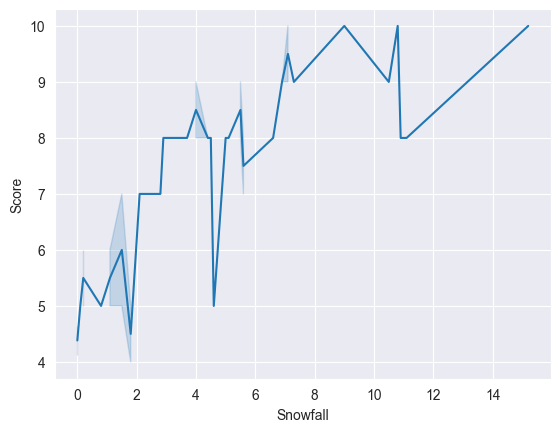

In [36]:
# Plotting
sns.lineplot(data=df, x="Snowfall", y="Score")


<Axes: xlabel='Wind', ylabel='Score'>

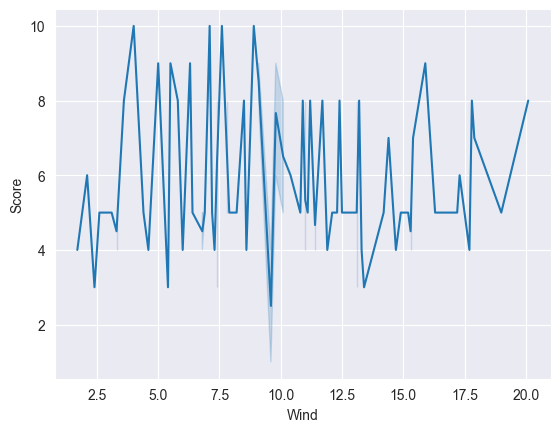

In [37]:
sns.lineplot(data=df, x="Wind", y="Score")

<Axes: xlabel='Skies', ylabel='Score'>

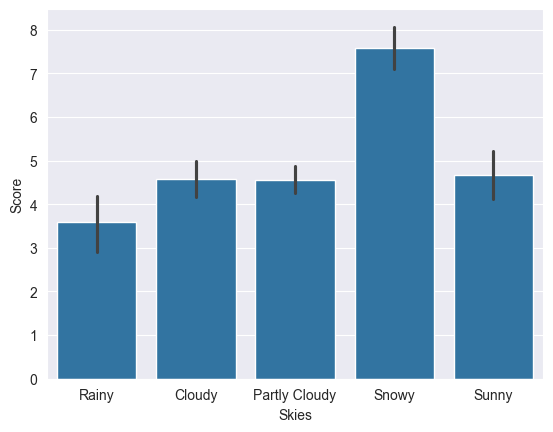

In [38]:
sns.barplot(data=df, x="Skies", y="Score")

In [47]:
# Model Building 1: Random Forest
# now lets split the data into train and test
from sklearn.model_selection import train_test_split

# Dropping unimportant columns for random forest model
df_clean = df_encoded.drop(['Date', 'Resort Name'], axis=1)  # Dropping datetime and resort name
df_clean.head()

# Putting feature variable to X
X = df_clean.drop('Score',axis=1)
# Putting response variable to y
y = df_clean['Score']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((62, 14), (28, 14))

In [48]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=50, oob_score=True)


In [49]:
# Fit Model
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=50, n_jobs=-1, oob_score=True,
                       random_state=42)

In [50]:
# Check OOB score
classifier_rf.oob_score_

0.7096774193548387

In [51]:
# Testing and evaluating model
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, classification_report, confusion_matrix



# Predicting model
y_pred = classifier_rf.predict(X_test)

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report (Precision, Recall, F1-Score)
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Mean Squared Error: 0.39285714285714285
Mean Absolute Error: 0.32142857142857145
Accuracy: 0.7142857142857143
Confusion Matrix:
 [[ 2  4  1  0]
 [ 0 11  2  0]
 [ 0  0  3  0]
 [ 0  0  1  4]]
Classification Report:
               precision    recall  f1-score   support

           2       1.00      0.29      0.44         7
           3       0.73      0.85      0.79        13
           4       0.43      1.00      0.60         3
           5       1.00      0.80      0.89         5

    accuracy                           0.71        28
   macro avg       0.79      0.73      0.68        28
weighted avg       0.81      0.71      0.70        28


In [ ]:
# Predict model
# Take in user information for new datapoint
# Put it into a dataframe
# Create a clean dataframe without unimportant variables
# use predict function on the single datapoint 
# Get the result, insert it back to uncleaned dataframe score
# Combine the dataframe with the original large dataframe (write it 

In [ ]:
# Hyperparameters Tuning (k-vold cross-validation)
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_score_

In [ ]:
# Selecting best model with best parameters
rf_best = grid_search.best_estimator_
rf_best

In [52]:
# Model 2: Linear Regression
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression().fit(X, y)
print(linear_model.coef_)
r_sq = linear_model.score(X, y)
print(f"coefficient of determination: {r_sq}")  


[-7.26609201e-03  1.77814173e-02  1.00422816e-01 -1.73938012e-02
 -1.40729643e-03 -2.27995248e-01 -1.14662932e-01 -9.67938809e-01
  1.43195441e+00 -1.21357425e-01  5.28760430e-01 -6.84128394e-01
  7.06155141e-02  8.47524494e-02]
coefficient of determination: 0.8022764306948003


In [54]:
# Predicting model
y_pred = linear_model.predict(X_test)

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


Mean Squared Error: 0.18326082595082369
Mean Absolute Error: 0.2997163916461378


ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [53]:
# Finding best parameters to run a linear model (k-fold, choose a smaller and less computational expensive method)
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.linear_model import LinearRegression

# Assuming X and y are already defined
best_lrmodel = LinearRegression()

# Define the feature selector
efs = EFS(best_lrmodel, 
          min_features=1, 
          max_features=len(X.columns), 
          scoring='r2', 
          print_progress=True, 
          cv=5)  # Change cv depending on your data

# Fit the model
efs = efs.fit(X, y)




C:\Users\jay00\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\jay00\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\jay00\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\jay00\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\U

In [56]:
# Best subset of features
best_feature_subset = list(efs.best_feature_names_)
print(best_feature_subset)
# Fit the model with the best subset of features
best_lrmodel.fit(X[best_feature_subset], y)
r_sq_b = best_lrmodel.score(X[best_feature_subset], y)
print(f"coefficient of determination: {r_sq_b}")
# Now 'model' is the Linear Regression model fitted with the best subset of features

['Snowfall', 'Wind', 'Skies_Rainy', 'Skies_Snowy', 'Snow Conditions_Packed Powder']
coefficient of determination: 0.7869624751100638


In [ ]:
# XGBoost model


In [ ]:
# Steps: Clean data, split test, create model (use k-fold and parameter tuning), get test score, compare two models, select the one with better performance as final model